In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pdb

### Logistic Regression

given Data D = {($x_{1,1},x_{1,2},\dots,x_{1,nBasis}$), ($x_{2,1},x_{2,2},\dots,x_{2,nBasis}$), ($x_{3,1},x_{3,2},\dots,x_{3,nBasis}$), ..., ($x_{nData,1},x_{nData,2},\dots,x_{nData,nBasis}$)}, $nBasis=given$

Label = {$label_1,label_2,\dots,label_{nData}$}
$$
A=\begin{bmatrix}x_{1,nBasis}&...&x_{1,2}&x_{1,1}&x_{1,0}\\x_{2,nBasis}&...&x_{2,2}&x_{2,1}&x_{2,0} \\ \vdots&\vdots&\vdots&\vdots&\vdots \\ x_{nData,nBasis}&...&x_{nData,2}&x_{nData,1}&x_{nData,0}\end{bmatrix}_{nData*(nBasis+1)},
\vec x=\begin{bmatrix}w_{nBasis}\\\vdots\\w_1\\w_0\end{bmatrix}_{(nBasis+1)*1},
\vec b=\begin{bmatrix}label_1\\label_2\\\vdots\\label_{nData}\end{bmatrix}_{nData*1}
$$
eg. given Data D = {($x_1,y_1$), ($x_2,y_2$), ($x_3,y_3$), ..., ($x_{nData},y_{nData}$)}, $nBasis=2$

Label = {$label_1,label_2,\dots,label_{nData}$}
$$
A=\begin{bmatrix}y_1&x_1&1\\y_2&x_2&1 \\ \vdots&\vdots&\vdots \\ y_{nData}&x_{nData}&1\end{bmatrix}_{nData*(2+1)},
\vec x=\begin{bmatrix}w_2\\w_1\\w_0\end{bmatrix}_{(2+1)*1},
\vec b=\begin{bmatrix}label_1\\label_2\\\vdots\\label_{nData}\end{bmatrix}_{nData*1}
$$

hint:之前nBasis包含了$\vec b$，但這次nBasis不包含$\vec b$，$\vec b$只單純作為label而已，所以在算$A,\vec x$時會算到(nBasis+1)來考慮到經由indicator function映射label到高維的結果

> compare with previous note
>
> given Data D = {($x_1,y_1$), ($x_2,y_2$), ($x_3,y_3$), ..., ($x_{nData},y_{nData}$)}, $nBasis=self-defined$
> $$
> A=\begin{bmatrix}x_1^{nBasis-1}&...&x_1^2&x_1&1\\x_2^{nBasis-1}&...&x_2^2&x_2&1 \\ \vdots&\vdots&\vdots&\vdots&\vdots \\ x_{nData}^{nBasis-1}&...&x_{nData}^2&x_{nData}&1\end{bmatrix},
> \vec x=\begin{bmatrix}w_{nBasis-1}\\\vdots\\w_1\\w_0\end{bmatrix},
> \vec b=\begin{bmatrix}y_1\\y_2\\\vdots\\y_{nData}\end{bmatrix}
> $$

**Steepest gradient descent**
$$
\begin{align}
\vec x_{n+1}&=\vec x_n +\text{learning rate}*\nabla f(\vec x_n)\\
&=\vec x_n +\text{learning rate}*A^T(\vec b-\frac{1}{1 +e^{-A\vec x_n}})
\end{align}
$$
**Newton's method**
$$
\begin{align}
\vec x_{n+1}&=\vec x_n +\text{learning rate}*H^{-1}f(\vec x_n) \nabla f(\vec x_n)\\
&=\vec x_n +\text{learning rate}*H^{-1}f(\vec x_n)(A^T(\vec b-\frac{1}{1+e^{-A\vec x_n}}))\\
H^{-1}f(\vec x_n)&=\begin{bmatrix}\frac{\partial^2 f}{\partial^2 w_0} & \frac{\partial^2 f}{\partial w_0 \partial w_1}& \dots&\frac{\partial^2 f}{\partial w_0 \partial w_{nBasis-1}}\\ \frac{\partial^2 f}{\partial w_1 \partial w_0} & \frac{\partial^2 f}{\partial^2 w_1} &\dots & \frac{\partial^2 f}{\partial w_1 \partial w_{nBasis-1}} \\ \vdots & \vdots &\ddots & \vdots \\ \frac{\partial^2 f}{\partial w_{nBasis-1}\partial w_0} & \frac{\partial^2 f}{\partial w_{nBasis-1}\partial w_1}&\dots& \frac{\partial^2 f}{\partial w_{nBasis-1}\partial w_{nBasis-1}} \end{bmatrix}\\
&=\frac{\partial}{\partial w_k}(A^T(\vec b-\frac{1}{1 +e^{-A\vec x_n}}))\\
&=\frac{\partial}{\partial w_k}(\sum_{i=1}^n x_{ij}(\frac{1}{1+e^{-A_i\vec x_n}})-y_i)\\
&=\sum_{i=1}^n x_{ij}*x_{ik}(\frac{-e^{x_i \vec x_n}}{1+e^{-A_i\vec x_n}})\\
&=A^TDA
\end{align}
$$


In [2]:
#from HW03
def UnivariateGaussianDataGenerator(mean, variance):
    z = np.sum(np.random.uniform(0.0, 1.0, 12))-6
    sample = mean + np.math.sqrt(variance) * z
    return sample

In [3]:
def PreprocessData(nData,mx1,vx1,my1,vy1,mx2,vx2,my2,vy2):
    #build data D1 and D2
    D1=np.zeros((nData,2))
    D2=np.zeros((nData,2))
    for i in range(nData):
        D1[i]=(UnivariateGaussianDataGenerator(mx1, vx1),UnivariateGaussianDataGenerator(my1, vy1)) #generate n data points as D1 i.i.d. (N(mx1,vx1),N(my1,vy1))
        D2[i]=(UnivariateGaussianDataGenerator(mx2, vx2),UnivariateGaussianDataGenerator(my2, vy2)) #generate n data points as D2 i.i.d. (N(mx2,vx2),N(my2,vy2))
    A1=np.append(D1[:,[i for i in reversed(range(nBasis))]],np.ones((nData, 1)),axis=1) #data D1 ; not A1=np.array([[math.pow(D1[j,0],i) for i in reversed(range(nBasis)) ]for j in range(nData)])
    A2=np.append(D2[:,[i for i in reversed(range(nBasis))]],np.ones((nData, 1)),axis=1) #data D2 ; not A2=np.array([[math.pow(D2[j,0],i) for i in reversed(range(nBasis)) ]for j in range(nData)])
    A=np.vstack((A1,A2)) #combine data D1 and D2 ; not A=np.append(A1,A2,axis=0)
    vec_b_truth=np.append(np.zeros((nData, 1)),np.ones((nData, 1)),axis=0) #label
    return D1,D2,A,vec_b_truth

In [4]:
def ConfusionMatrix(vec_b_truth,vec_b_predict):
    matrix=np.zeros((2,2))
    matrix[0,0]=np.sum((vec_b_truth==1)&(vec_b_predict==1)) #TP
    matrix[0,1]=np.sum((vec_b_truth==1)&(vec_b_predict==0)) #FN
    matrix[1,0]=np.sum((vec_b_truth==0)&(vec_b_predict==1)) #FP
    matrix[1,1]=np.sum((vec_b_truth==0)&(vec_b_predict==0)) #TN
    return matrix

In [5]:
def Message(nBasis,vec_x,confusionMatrix):
    #print model parameter
    print("w(should read from bottom and the bottom of power is 0th not (nBasis-1-th):")
    for i in range(nBasis+1):
        print(vec_x[i].item())
    print("",end="\n\n")
    
    print("Confusion Matrix:")
    print("               Predict cluster 1  Predict cluster 2")
    print("Is cluster 1        {:.0f}               {:.0f}       ".format(confusionMatrix[0,0],confusionMatrix[0,1]))
    print("Is cluster 2        {:.0f}               {:.0f}       ".format(confusionMatrix[1,0],confusionMatrix[1,1]))
    print("",end="\n")
    print("Sensitivity (Successfully predict cluster 1): {}".format(confusionMatrix[0,0]/(confusionMatrix[0,0]+confusionMatrix[1,0])))
    print("Specificity (Successfully predict cluster 2): {}".format(confusionMatrix[0,0]/(confusionMatrix[0,0]+confusionMatrix[0,1])))
    print("",end="\n")

In [6]:
def VisualizationMy(fig,D1,D2,A,vec_x_nt,vec_x_gd,vec_b_truth):
    
    #show data D1 and D2
    ax1=fig.add_subplot(221)
    ax1.set_title("Inital data")
    ax1.scatter(np.append(D1,D2,axis=0)[:,0],np.append(D1,D2,axis=0)[:,1])
    
    ax2 = fig.add_subplot(222, projection="3d")
    ax2.set_title("Initial data thourgh indicating function")
    ax2.scatter3D(np.append(D1,D2,axis=0)[:,0], np.append(D1,D2,axis=0)[:,1], vec_b_truth)
    
    #show result
    ax3 = fig.add_subplot(223, projection="3d")
    ax3.set_title("Newton's method")
    ax3.scatter3D(np.append(D1,D2,axis=0)[:,0], np.append(D1,D2,axis=0)[:,1], 1/(1+np.exp(-A@vec_x_nt)))

    ax4 = fig.add_subplot(224, projection="3d")
    ax4.set_title("Gradient descent")
    ax4.scatter3D(np.append(D1,D2,axis=0)[:,0], np.append(D1,D2,axis=0)[:,1], 1/(1+np.exp(-A@vec_x_gd)))

    visualD=np.zeros((0,2))
    nVisualData=100
    for i in range(len(np.linspace(-5,15,nVisualData))):
        visualDNew=np.append(np.linspace(-5,15,nVisualData).reshape(-1,1),np.full(nVisualData,np.linspace(-10,10,nVisualData)[i]).reshape(-1,1),axis=1)
        visualD=visualDNew if i==0 else np.vstack((visualD,visualDNew))
    visualA=np.append(visualD[:,[i for i in reversed(range(nBasis))]],np.ones((nVisualData*nVisualData, 1)),axis=1)
    Z =(1/(1+np.exp(-visualA@vec_x_nt)))
    ax3.plot3D(visualD[:,0].reshape(-1), visualD[:,1].reshape(-1), Z.reshape(-1),"gray")

    Z =(1/(1+np.exp(-visualA@vec_x_gd)))
    ax4.plot3D(visualD[:,0].reshape(-1), visualD[:,1].reshape(-1), Z.reshape(-1),"gray")

In [7]:
def VisualizationOther(fig,D1,D2,vec_b_truth,vec_b_nt,vec_b_gd):
    D=np.append(D1,D2,axis=0)
    #ground truth
    ax1=fig.add_subplot(131)
    ax1.set_title("Ground Truth")
    ax1.plot(D[(vec_b_truth==0).reshape(-1),0],D[(vec_b_truth==0).reshape(-1),1],'ro') #vec_b_truth==0
    ax1.plot(D[(vec_b_truth==1).reshape(-1),0],D[(vec_b_truth==1).reshape(-1),1],'bo') #vec_b_truth==1
    
    #newton's method
    ax2=fig.add_subplot(132)
    ax2.set_title("Newton's method")
    ax2.plot(D[(vec_b_nt==0).reshape(-1),0],D[(vec_b_nt==0).reshape(-1),1],'ro') #vec_b_nt==0
    ax2.plot(D[(vec_b_nt==1).reshape(-1),0],D[(vec_b_nt==1).reshape(-1),1],'bo') #vec_b_nt==1
    
    #gradient descent
    ax3=fig.add_subplot(133)
    ax3.set_title("Gradient descent")
    ax3.plot(D[(vec_b_gd==0).reshape(-1),0],D[(vec_b_gd==0).reshape(-1),1],'ro') #vec_b_gd==0
    ax3.plot(D[(vec_b_gd==1).reshape(-1),0],D[(vec_b_gd==1).reshape(-1),1],'bo') #vec_b_gd==1

In [8]:
def GradientDescent(A,vec_b_truth,vec_x0,lr,eps):
    while True:
        vec_x1=vec_x0+lr*A.T@(vec_b_truth-1/(1+np.exp(-A@vec_x0)))
        if (abs(vec_x0-vec_x1)<eps).all(): #if vec_x0 and vec_x1 is close enough, break
            break
        vec_x0=vec_x1 #print(hex(id(vec_x0)),hex(id(vec_x1)))
    return vec_x1

In [9]:
def Newton(A,vec_b_truth,vec_x0,lr,eps):
    nData=len(A)
    D=np.zeros((nData,nData))
    for i in range(nData):
        D[i,i]=np.exp(-A[i]@vec_x0)/np.power(1+np.exp(-A[i]@vec_x0),2) #diagonal matrix
    H=A.T@D@A
    try:
        inv_H=np.linalg.inv(H) #test whether H is singular
    except np.linalg.LinAlgError as error: #if yes, do gradient descent
        return GradientDescent(A,vec_b_truth,vec_x0,lr,eps)
    else: #if no, do newton's method
        while True:
            vec_x1=vec_x0+lr*inv_H@A.T@(vec_b_truth-1/(1+np.exp(-A@vec_x0)))
            if (abs(vec_x0-vec_x1)<eps).all():
                break
            vec_x0=vec_x1
        return vec_x1

Gradient descent:
w(should read from bottom and the bottom of power is 0th not (nBasis-1-th):
0.4084735798849783
0.5961427039487617
-1.5876794780195584


Confusion Matrix:
               Predict cluster 1  Predict cluster 2
Is cluster 1        40               10       
Is cluster 2        12               38       

Sensitivity (Successfully predict cluster 1): 0.7692307692307693
Specificity (Successfully predict cluster 2): 0.8

----------------------------------------
Newton's method
w(should read from bottom and the bottom of power is 0th not (nBasis-1-th):
0.5383319458663863
0.7425216806168766
-2.2238114563033204


Confusion Matrix:
               Predict cluster 1  Predict cluster 2
Is cluster 1        38               12       
Is cluster 2        10               40       

Sensitivity (Successfully predict cluster 1): 0.7916666666666666
Specificity (Successfully predict cluster 2): 0.76



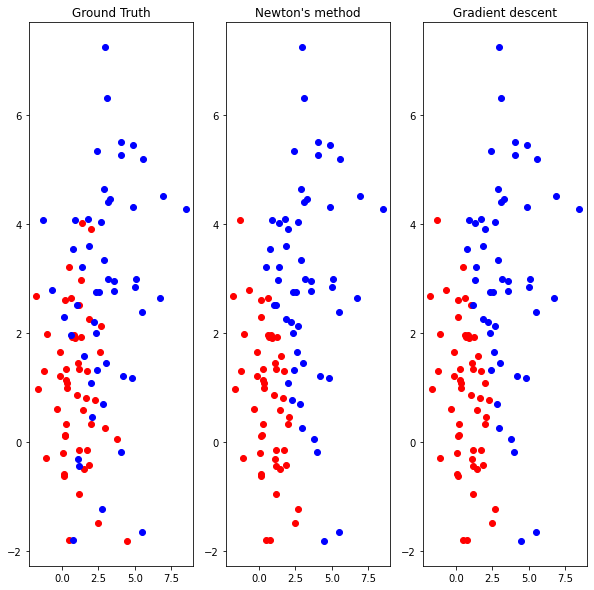

In [11]:
if __name__=='__main__':
    #input ground truth's parameter
    nBasis=2 #default
    #nData=int(input("N: "))
    #(mx1,vx1,my1,vy1)=map(int, input("mx1 vx1 my1 vy1: ").split())
    #(mx2,vx2,my2,vy2)=map(int, input("mx2 vx2 my2 vy2: ").split())
    nData=50
    mx1=my1=1
    mx2=my2=3
    vx1=vy1=2
    vx2=vy2=4

    #build ground truth's data and label
    D1,D2,A,vec_b_truth=PreprocessData(nData,mx1,vx1,my1,vy1,mx2,vx2,my2,vy2)

    #initialize model parameter, learning rate, and epsilon
    vec_x0=np.ones((nBasis+1,1)) #model parameter
    lr=0.01 #learning rate
    eps=0.01 #epsilon

    #run algorithm to get appropriate model parameter and predictive label
    vec_x_nt=Newton(A,vec_b_truth,vec_x0,lr,eps) #run Newton's method to find appropriate model parameter
    vec_x_gd=GradientDescent(A,vec_b_truth,vec_x0,lr,eps) #run gradient descent to find appropriate model parameter
    vec_b_nt_predict=1*(1/(1+np.exp(-A@vec_x_nt))>0.5)
    vec_b_gd_predict=1*(1/(1+np.exp(-A@vec_x_gd))>0.5)
    
    #build confusion matrix
    confusionMatrix_nt=ConfusionMatrix(vec_b_truth,vec_b_nt_predict)
    confusionMatrix_gd=ConfusionMatrix(vec_b_truth,vec_b_gd_predict)
    
    #print message and draw
    print("Gradient descent:")
    Message(nBasis,vec_x_nt,confusionMatrix_nt)
    print("----------------------------------------")
    print("Newton's method")
    Message(nBasis,vec_x_gd,confusionMatrix_gd)
    
    #drawing
    fig = plt.figure(figsize=(10,10))
    #VisualizationMy(fig,D1,D2,A,vec_x_nt,vec_x_gd,vec_b_truth)
    VisualizationOther(fig,D1,D2,vec_b_truth,vec_b_nt_predict,vec_b_gd_predict)

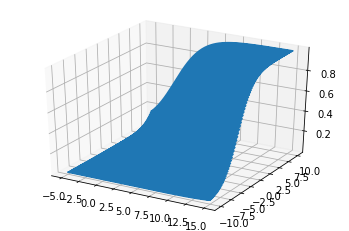

In [11]:
D=np.zeros((0,2))
nVisualData=100
for i in range(len(np.linspace(-5,15,nVisualData))):
    Dnew=np.append(np.linspace(-5,15,nVisualData).reshape(-1,1),np.full(nVisualData,np.linspace(-10,10,nVisualData)[i]).reshape(-1,1),axis=1)
    D=Dnew if i==0 else np.vstack((D,Dnew))
A=np.append(D[:,[i for i in reversed(range(nBasis))]],np.ones((nVisualData*nVisualData, 1)),axis=1)
Z =(1/(1+np.exp(-A@vec_x_gd)))
fig = plt.figure()
axis = plt.axes(projection="3d")
axis.plot3D(D[:,0].reshape(-1), D[:,1].reshape(-1), Z.reshape(-1))

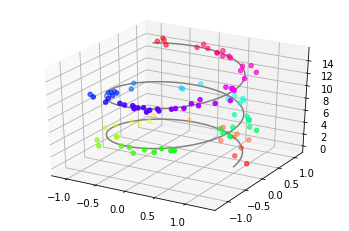

In [11]:
fig = plt.figure() 
ax = plt.axes(projection="3d") 
z_line = np.linspace(0, 15, 1000) 
x_line = np.cos(z_line) 
y_line = np.sin(z_line) 
ax.plot3D(x_line, y_line, z_line, "gray") 
z_points = 15 * np.random.random(100) 
x_points = np.cos(z_points) + 0.1 * np.random.randn(100) 
y_points = np.sin(z_points) + 0.1 * np.random.randn(100) 
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap="hsv"); 
plt.show()
